In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('onewayoranother2.csv', low_memory=False)

In [3]:
df.head()

,Unnamed: 0,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,valence,year,artists,userid,playcount,genres
0,0,0.995,Singende Bataillone 1. Teil Carl Woitschach,0.708,0.002377,-0.002373,0.1950,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10.0,0.1510,0.0,0.0506,0.7790,1928.0,Carl Woitschach,109679.0,1.0,[]
1,1,0.994,"Fantasiestücke, Op. 111: Più tosto lento Rober...",0.379,0.001685,-0.005434,0.0135,6KuQTIu1KoTTkLXKrwlLPV,0.901,8.0,0.0763,0.0,0.0462,0.0767,1928.0,Robert Schumann,13441.0,6.0,"['classical', 'early romantic era']"
2,2,0.994,"Fantasiestücke, Op. 111: Più tosto lento Rober...",0.379,0.001685,-0.005434,0.0135,2YPbmbRIo7I1r9FAMqNjbZ,0.901,8.0,0.0763,0.0,0.0462,0.0767,1928.0,Robert Schumann,25637.0,9.0,"['classical', 'early romantic era']"
3,3,0.604,Chapter 1.18 - Zamek kaniowski Seweryn Goszczy...,0.749,0.002150,-0.003805,0.2200,6L63VW0PibdM1HDSBoqnoM,0.000,5.0,0.1190,0.0,0.9290,0.8800,1928.0,Seweryn Goszczyński,63548.0,1.0,[]
4,4,0.995,Bebamos Juntos - Instrumental (Remasterizado) ...,0.781,0.002167,-0.002814,0.1300,6M94FkXd15sOAOQYRnWPN8,0.887,1.0,0.1110,0.0,0.0926,0.7200,1928.0,Francisco Canaro,10501.0,9.0,"['tango', 'vintage tango']"


In [4]:
df.drop(['Unnamed: 0','playcount','userid'], axis =1, inplace=True)

In [5]:
df.drop(['genres','artists'], axis=1, inplace=True)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df=df.sort_values('popularity')
df = df.drop_duplicates(subset='name',keep = 'last')
df = df.reset_index(drop=True)

In [8]:
X = np.array([df['year'],df['popularity'], df['key']])

In [9]:
X[0] = (X[0]-1920)/100
X[1] = X[1]/100
X[2] = X[2]/10
df = df.drop(['year','popularity','key'],axis=1)
df.insert(8, "key", X[2])
df.insert(10, "popularity", X[1])
df.insert(13, "year", X[0])

In [10]:
df.head()

,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,valence,year
0,0.995,Singende Bataillone 1. Teil Carl Woitschach,0.708,0.002377,-0.002373,0.1950,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,1.0,0.1510,0.0,0.0506,0.779,0.08
1,0.991,Taat Bichhude Hriday Ko Janabai Pawar,0.401,0.001517,-0.002016,0.0768,2oRx7AxQhAVADRDm5JWSkZ,0.031400,1.0,0.1840,0.0,0.1010,0.219,0.17
2,0.681,I Still Miss Someone (Live) The 1937 Flood,0.258,0.003239,-0.002591,0.2800,2pAphIGAE5LZXUQ4FHXWSK,0.000059,0.7,0.7130,0.0,0.0327,0.371,0.17
3,0.981,The Merry-Go-Round Broke Down Yohai Gabai,0.367,0.002954,-0.005030,0.1440,2t50nhzS2RaD0VCKuxicyh,0.888000,0.8,0.0974,0.0,0.0593,0.951,0.17
4,0.995,Nadi Kinare Baith Ke Aao Motilal & Maya Banerjee,0.519,0.002063,-0.003504,0.1650,2tOe8L9qt1S6JkavxdTjaH,0.887000,0.0,0.2360,0.0,0.0340,0.592,0.17


In [11]:
df.shape

(156581, 14)

In [12]:
df.dtypes

acousticness        float64
name                 object
danceability        float64
tempo               float64
loudness            float64
energy              float64
id                   object
instrumentalness    float64
key                 float64
liveness            float64
popularity          float64
speechiness         float64
valence             float64
year                float64
dtype: object

le = LabelEncoder()
n_id= le.fit_transform(df['id'])

df.insert(14, 'song_id', n_id)

df.drop('id', axis=1, inplace=True)

df.head(25)

In [13]:
X = df.copy()

In [14]:
X.head(25)

,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,valence,year
0,0.995,Singende Bataillone 1. Teil Carl Woitschach,0.708,0.002377,-0.002373,0.1950,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,1.0,0.1510,0.0,0.0506,0.77900,0.08
1,0.991,Taat Bichhude Hriday Ko Janabai Pawar,0.401,0.001517,-0.002016,0.0768,2oRx7AxQhAVADRDm5JWSkZ,0.031400,1.0,0.1840,0.0,0.1010,0.21900,0.17
2,0.681,I Still Miss Someone (Live) The 1937 Flood,0.258,0.003239,-0.002591,0.2800,2pAphIGAE5LZXUQ4FHXWSK,0.000059,0.7,0.7130,0.0,0.0327,0.37100,0.17
3,0.981,The Merry-Go-Round Broke Down Yohai Gabai,0.367,0.002954,-0.005030,0.1440,2t50nhzS2RaD0VCKuxicyh,0.888000,0.8,0.0974,0.0,0.0593,0.95100,0.17
4,0.995,Nadi Kinare Baith Ke Aao Motilal & Maya Banerjee,0.519,0.002063,-0.003504,0.1650,2tOe8L9qt1S6JkavxdTjaH,0.887000,0.0,0.2360,0.0,0.0340,0.59200,0.17
5,0.466,Twenty Mushy Peas,0.626,0.003599,-0.002387,0.2620,2tZh9tABC2gtF4XXxIr0xj,0.001700,0.7,0.3520,0.0,0.0636,0.78600,0.17
6,0.988,Milonga Triste - Remasterizado Francisco Canar...,0.392,0.001523,-0.001099,0.4990,2vyWt57TTI38yT5pMQ8ton,0.058000,0.2,0.1740,0.0,0.0636,0.40200,0.17
7,0.995,"Grand Sonata, Op. 22: Minuet Fernando Sor & Ju...",0.704,0.001641,-0.003987,0.0968,2wYOkIAWfWRJvQ82Xbq98m,0.926000,0.6,0.1170,0.0,0.1060,0.55800,0.17
8,0.971,Pericon Nacional - Instrumental (Remasterizado...,0.563,0.003196,-0.001422,0.4010,2wirqJ3CQ8nkvCfFbrTs7g,0.904000,0.8,0.1070,0.0,0.1080,0.86000,0.17
9,0.522,Eight Mushy Peas,0.723,0.002438,-0.002489,0.3680,2xQ7gKGxAwDx5darYW3IDM,0.000052,0.9,0.2310,0.0,0.0477,0.46700,0.17


In [15]:
X.drop(['name','id'], axis = 1, inplace=True)

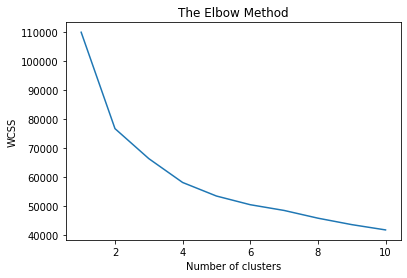

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [18]:
input = df[df['name'] == 'Dancing Queen ABBA']

In [19]:
input

,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,valence,year
153909,0.382,Dancing Queen ABBA,0.539,0.002023,-0.001247,0.884,4NtUY5IGzHCaqfZemmAu56,0.00166,0.9,0.76,0.72,0.0403,0.752,0.56


In [20]:
n_input = input.iloc[0,:]

In [21]:
print(n_input)

acousticness                         0.382
name                    Dancing Queen ABBA
danceability                         0.539
tempo                           0.00202268
loudness                         -0.001247
energy                               0.884
id                  4NtUY5IGzHCaqfZemmAu56
instrumentalness                   0.00166
key                                    0.9
liveness                              0.76
popularity                            0.72
speechiness                         0.0403
valence                              0.752
year                                  0.56
Name: 153909, dtype: object


In [22]:
n_input.drop(['name','id'], axis = 0, inplace=True)

C:\Users\Naveeta\Anaconda3\lib\site-packages\pandas\core\generic.py:3917: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


n_input.drop('cluster_no', axis = 0, inplace=True)

In [23]:
def cluster_predict(input):
  prediction = kmeans.predict(input)
  return prediction 

In [24]:
pred = kmeans.predict([n_input])

In [25]:
pred[0]

0

In [26]:
print(y_kmeans)

[4 4 4 ... 0 0 2]


In [27]:
df['cluster_no'] = y_kmeans

In [28]:
df.head()

,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,valence,year,cluster_no
0,0.995,Singende Bataillone 1. Teil Carl Woitschach,0.708,0.002377,-0.002373,0.1950,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,1.0,0.1510,0.0,0.0506,0.779,0.08,4
1,0.991,Taat Bichhude Hriday Ko Janabai Pawar,0.401,0.001517,-0.002016,0.0768,2oRx7AxQhAVADRDm5JWSkZ,0.031400,1.0,0.1840,0.0,0.1010,0.219,0.17,4
2,0.681,I Still Miss Someone (Live) The 1937 Flood,0.258,0.003239,-0.002591,0.2800,2pAphIGAE5LZXUQ4FHXWSK,0.000059,0.7,0.7130,0.0,0.0327,0.371,0.17,4
3,0.981,The Merry-Go-Round Broke Down Yohai Gabai,0.367,0.002954,-0.005030,0.1440,2t50nhzS2RaD0VCKuxicyh,0.888000,0.8,0.0974,0.0,0.0593,0.951,0.17,3
4,0.995,Nadi Kinare Baith Ke Aao Motilal & Maya Banerjee,0.519,0.002063,-0.003504,0.1650,2tOe8L9qt1S6JkavxdTjaH,0.887000,0.0,0.2360,0.0,0.0340,0.592,0.17,3


In [29]:
df.dtypes

acousticness        float64
name                 object
danceability        float64
tempo               float64
loudness            float64
energy              float64
id                   object
instrumentalness    float64
key                 float64
liveness            float64
popularity          float64
speechiness         float64
valence             float64
year                float64
cluster_no            int32
dtype: object

In [30]:
df.describe()

,acousticness,danceability,tempo,loudness,energy,instrumentalness,key,liveness,popularity,speechiness,valence,year,cluster_no
count,156581.000000,156581.000000,156581.000000,156581.000000,156581.000000,156581.000000,156581.000000,156581.000000,156581.000000,156581.000000,156581.000000,156581.000000,156581.000000
mean,0.495743,0.537486,0.002345,-0.002176,0.487058,0.163081,0.520085,0.207608,0.316901,0.096321,0.531059,0.572146,1.786404
std,0.376828,0.175628,0.000618,0.001082,0.267364,0.309934,0.351617,0.177596,0.217322,0.154419,0.262422,0.256558,1.391642
min,0.000000,0.000000,0.000000,-0.011458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,0.095800,0.416000,0.001873,-0.002772,0.262000,0.000000,0.200000,0.098700,0.120000,0.035000,0.321000,0.370000,1.000000
50%,0.499000,0.547000,0.002303,-0.002005,0.478000,0.000212,0.500000,0.136000,0.340000,0.045300,0.543000,0.580000,2.000000
75%,0.890000,0.667000,0.002723,-0.001362,0.708000,0.091800,0.800000,0.264000,0.480000,0.076800,0.748000,0.790000,3.000000
max,0.996000,0.988000,0.004897,0.000736,1.000000,1.000000,1.100000,1.000000,1.000000,0.969000,1.000000,1.000000,4.000000


In [31]:
def recommend(song):
  predicted_cluster = cluster_predict(song)
  cluster_df = df[df['cluster_no'] == predicted_cluster[0]]
  return cluster_df

In [32]:
result = recommend([n_input])

In [33]:
result.iloc[5600:5620, 1]

69677    Tristes Recuerdos Ramon Ayala Y Sus Bravos Del...
69680                                   Time Out Joe Walsh
69686                                 Los Bastardos Primus
69687                                 Junebug "The B-52's"
69691                                  E Z Rider Taj Mahal
69693                   No One Can Do It Better The D.O.C.
69708         Sweet Caroline - Opening Night Elvis Presley
69711    Megatron Must Be Stopped - Parts 1 & 2 Vince D...
69715    Mary Had A Little Lamb - Live at Ripley's Musi...
69718          La Charreada - 2016 Remaster Linda Ronstadt
69724                             Rock Me To The Top Tesla
69729    Sólo Sé Que Fue en Marzo Julio Preciado Y Su B...
69732    Sun Goddess - Live Earth, Wind & Fire & Ramsey...
69737                                      Cantando Bronco
69739                                             Dim Dada
69740    Harvester of Sorrow (Live - Seattle '89) Metal...
69744                        Sixteen Blue The Replacemen

In [34]:
result.shape

(38444, 15)

In [35]:
X.shape

(156581, 12)

In [36]:
cluster_0 = df[df['cluster_no'] == 0]
cluster_1 = df[df['cluster_no'] == 1]
cluster_2 = df[df['cluster_no'] == 2]
cluster_3 = df[df['cluster_no'] == 3]
cluster_4 = df[df['cluster_no'] == 4]

In [37]:
cluster_0.head()

,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,valence,year,cluster_no
252,0.244000,Kon Bhiruke Bhoi Dekhabi Sharmila Roy Pommot,0.604,0.001891,-0.001137,0.652,1OoPVxv1JErxD03jBZqbFT,0.00000,0.6,0.3640,0.0,0.0340,0.6710,0.21,0
313,0.010000,Mamma mia che vò sapè - Musical base Version O...,0.170,0.003693,-0.002243,0.432,0ZF4LeyXA8r4IqQ5Xynrbt,0.35800,0.7,0.1410,0.0,0.0324,0.3470,0.22,0
324,0.002000,Sämsta Ligget I Stan Local Oafs,0.312,0.001929,-0.000766,0.996,1WgRBwGnK9wfbrCClXSOBs,0.07100,0.9,0.1520,0.0,0.1340,0.0414,0.21,0
566,0.000295,Take the B Train Why Not,0.412,0.002234,-0.001262,0.902,0cqKNFM0cWTOyfF0ZikUaW,0.83300,0.9,0.0957,0.0,0.0538,0.6270,0.10,0
580,0.032900,Sondela Dj Shungi & Nthabiseng,0.657,0.002487,-0.001077,0.792,14fRLwIootSl01UKBRHql3,0.00777,0.9,0.1080,0.0,0.0426,0.5160,0.08,0


In [38]:
X_0 = cluster_0.copy()

In [39]:
X_0.drop(['name','cluster_no','id'], axis = 1, inplace=True)

In [40]:
sub_pred_0 = kmeans.fit_predict(X_0)

In [41]:
print(sub_pred_0)

[1 4 0 ... 1 3 3]


In [42]:
cluster_0['sub_cluster'] = sub_pred_0

C:\Users\Naveeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
cluster_0.head()

,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,valence,year,cluster_no,sub_cluster
252,0.244000,Kon Bhiruke Bhoi Dekhabi Sharmila Roy Pommot,0.604,0.001891,-0.001137,0.652,1OoPVxv1JErxD03jBZqbFT,0.00000,0.6,0.3640,0.0,0.0340,0.6710,0.21,0,1
313,0.010000,Mamma mia che vò sapè - Musical base Version O...,0.170,0.003693,-0.002243,0.432,0ZF4LeyXA8r4IqQ5Xynrbt,0.35800,0.7,0.1410,0.0,0.0324,0.3470,0.22,0,4
324,0.002000,Sämsta Ligget I Stan Local Oafs,0.312,0.001929,-0.000766,0.996,1WgRBwGnK9wfbrCClXSOBs,0.07100,0.9,0.1520,0.0,0.1340,0.0414,0.21,0,0
566,0.000295,Take the B Train Why Not,0.412,0.002234,-0.001262,0.902,0cqKNFM0cWTOyfF0ZikUaW,0.83300,0.9,0.0957,0.0,0.0538,0.6270,0.10,0,4
580,0.032900,Sondela Dj Shungi & Nthabiseng,0.657,0.002487,-0.001077,0.792,14fRLwIootSl01UKBRHql3,0.00777,0.9,0.1080,0.0,0.0426,0.5160,0.08,0,1


In [44]:
cluster_0[cluster_0['sub_cluster'] == 3]

,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,valence,year,cluster_no,sub_cluster
21027,0.1930,Reality Check Swae Lee,0.539,0.002407,-0.002128,0.416,2p72O2JobPc9sVz520Hil5,0.000000,0.9,0.1880,0.00,0.0580,0.0804,1.00,0,3
28942,0.5570,No Tengo Nada Alejandro Sanz,0.534,0.002964,-0.001278,0.614,5zXZ81tFaZ0bbfgkvjGyoT,0.000000,1.0,0.1990,0.02,0.0407,0.2380,1.00,0,3
34323,0.1690,Back Beat Johnny Hodges & Gerry Mulligan,0.847,0.002339,-0.002322,0.313,6YflSNd6sPlzlazQsA3QFK,0.018600,0.6,0.2400,0.08,0.0380,0.3900,0.39,0,3
35875,0.0370,Day By Day Sun Ra,0.427,0.003393,-0.002689,0.353,45Czpw4y06gQDCCDzCiYxD,0.000000,0.7,0.1090,0.09,0.1770,0.3070,0.40,0,3
38510,0.0676,Keep an Eye On Summer (Stereo) The Beach Boys,0.393,0.001459,-0.002089,0.398,2eeJUzZigyFCFruBDsFZad,0.002550,0.6,0.1920,0.12,0.0259,0.4630,0.44,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156571,0.7490,Party Girl StaySolidRocky,0.728,0.002609,-0.001903,0.431,5RqR4ZCCKJDcBLIn4sih9l,0.000000,0.6,0.0996,0.94,0.0622,0.6290,1.00,0,3
156572,0.6920,Dance Monkey Tones And I,0.824,0.001967,-0.001222,0.588,2XU0oxnq2qxCpomAAuJY8K,0.000104,0.6,0.1490,0.94,0.0924,0.5130,0.99,0,3
156573,0.0686,ily (i love you baby) (feat. Emilee) Surf Mesa...,0.674,0.002248,-0.001445,0.774,62aP9fBQKYKxi7PDXwcUAS,0.001880,1.1,0.3930,0.95,0.0892,0.3300,0.99,0,3
156578,0.7310,death bed (coffee for your head) (feat. beabad...,0.726,0.002890,-0.001674,0.431,7eJMfftS33KTjuF7lTsMCx,0.000000,0.8,0.6960,0.97,0.1350,0.3480,1.00,0,3


In [45]:
X_1 = cluster_1.copy()

In [46]:
X_1.drop(['name','cluster_no','id'], axis = 1, inplace=True)

In [47]:
sub_pred_1 = kmeans.fit_predict(X_1)

In [48]:
cluster_1['sub_cluster'] = sub_pred_1

C:\Users\Naveeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
cluster_1[cluster_1['sub_cluster'] == 2]

,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,valence,year,cluster_no,sub_cluster
54,0.608,Ragtime Annie The 1937 Flood,0.549,0.002318,-0.001801,0.570,2fFvUFDld9WCRqhs06ewJ6,0.386000,0.2,0.1380,0.00,0.0456,0.867,0.17,1,2
136,0.491,Soy Morenita Sylvia de Grasse & Avelino Muñoz,0.673,0.002128,-0.001965,0.473,0UpoHr317FpPukFKyErtU3,0.000728,0.1,0.1480,0.00,0.1080,0.664,0.15,1,2
184,0.582,Georgie Buck The 1937 Flood,0.578,0.002287,-0.001434,0.460,1Ao6ADjXI5w6q8Mxn9OolM,0.000073,0.0,0.1470,0.00,0.0343,0.806,0.17,1,2
263,0.197,Бабка басс ОТВАЛ БАWKN & Cartier99 & Viktar228,0.707,0.003288,-0.000906,0.540,1BvvZrT6f0QGPMYccJeZFv,0.002110,0.0,0.1060,0.00,0.2310,0.420,0.21,1,2
283,0.689,Mondonguero Xavier Cugat & His Waldorf-Astoria...,0.504,0.001592,-0.001498,0.768,18BSEMvAs3mBdK3jeg3vuH,0.000003,0.0,0.2280,0.00,0.0874,0.851,0.21,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151541,0.760,Baby Love The Supremes,0.595,0.002721,-0.001771,0.643,5uES1C2NgkdrNHiCwf9jRr,0.000000,0.5,0.5380,0.69,0.0365,0.730,0.44,1,2
152489,0.936,Eleanor Rigby - Remastered 2009 The Beatles,0.581,0.002765,-0.001736,0.280,5GjPQ0eI7AgmOnADn1EO6Q,0.000016,0.4,0.3050,0.70,0.0381,0.813,0.46,1,2
153518,0.780,I Want You to Want Me Cheap Trick,0.806,0.001860,-0.002440,0.462,1JkZg3eMQTmTn93E8Yd3UL,0.013400,0.2,0.1500,0.72,0.0298,0.736,0.57,1,2
154039,0.718,Wouldn't It Be Nice - Stereo Mix The Beach Boys,0.392,0.002498,-0.001347,0.629,2Gy7qnDwt8Z3MNxqat4CsK,0.000004,0.5,0.1290,0.73,0.0335,0.720,0.46,1,2


In [50]:
X_2 = cluster_2.copy()

In [51]:
X_2.drop(['name','cluster_no','id'], axis = 1, inplace=True)

In [52]:
sub_pred_2 = kmeans.fit_predict(X_2)

In [53]:
cluster_2['sub_cluster'] = sub_pred_2

C:\Users\Naveeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
cluster_2[cluster_2['sub_cluster'] == 1]

,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,valence,year,cluster_no,sub_cluster
964,0.002120,Parallax Future Rapper,0.570,0.002049,-0.001914,0.621,2paUNK969mjN9A8cXLnHfp,0.022500,0.2,0.331,0.00,0.0904,0.338,0.06,2,1
1352,0.051400,O surdato 'nnammurato - Musical base Version O...,0.683,0.002583,-0.003092,0.298,0c6OdSkzGoVMcpULXqufsz,0.057000,0.5,0.617,0.00,0.0379,0.908,0.22,2,1
6379,0.613000,"Phir Kabhi (From ""M.S.Dhoni - The Untold Story...",0.405,0.001644,-0.001050,0.664,0vv7WPmdbL3fkN8UsiiFqh,0.000001,0.4,0.525,0.00,0.0328,0.400,1.00,2,1
6458,0.305000,"Ik Vaari Aa (From ""Raabta"") Arijit Singh",0.511,0.002567,-0.000928,0.752,3xuUW0IwM2VbVgZSbVORzR,0.000000,0.4,0.708,0.00,0.0535,0.428,1.00,2,1
7258,0.000405,Let Your Hair Down (& Shake It Loose) Slowburner,0.451,0.002712,-0.001040,0.985,6xtuaPQaURYYWy14ZEEWBp,0.000003,0.0,0.308,0.00,0.0538,0.482,0.10,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155776,0.016200,POWER Kanye West,0.543,0.003090,-0.000906,0.915,2gZUPNdnz5Y45eiGxpHGSc,0.000000,0.0,0.744,0.78,0.1130,0.577,0.90,2,1
155897,0.299000,Always Remember Us This Way Lady Gaga,0.553,0.002608,-0.001140,0.502,2rbDhOo9Fh61Bbu23T2qCk,0.000000,0.0,0.764,0.79,0.0409,0.296,0.98,2,1
155951,0.010300,All The Small Things blink-182,0.434,0.002984,-0.000939,0.897,2m1hi0nfMR9vdGC8UcrnwU,0.000000,0.0,0.612,0.79,0.0488,0.684,0.79,2,1
156266,0.298000,Good as Hell (feat. Ariana Grande) - Remix Liz...,0.668,0.001925,-0.000573,0.892,07Oz5StQ7GRoygNLaXs2pd,0.000000,0.5,0.735,0.82,0.0645,0.478,0.99,2,1


In [55]:
X_3 = cluster_3.copy()

In [56]:
X_3.drop(['name','cluster_no','id'], axis = 1, inplace=True)

In [57]:
sub_pred_3 = kmeans.fit_predict(X_3)

In [58]:
cluster_3['sub_cluster'] = sub_pred_3

C:\Users\Naveeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
cluster_3[cluster_3['sub_cluster'] == 3]

,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,valence,year,cluster_no,sub_cluster
8229,0.9950,Orgelbüchlein - Arr. For Piano Four Hands by G...,0.402,0.001228,-0.005698,0.01440,6F0mBVGUg6BsjPBxppZY3B,0.854,0.9,0.0672,0.00,0.0482,0.1470,1.00,3,3
45068,0.0935,The Tennessee Toad Leo Kottke,0.405,0.001715,-0.003962,0.16700,1TyoGw0PmdrlQCMHVakhHN,0.918,0.4,0.1300,0.17,0.0335,0.1680,0.54,3,3
46953,0.5990,Hamburger Lady - Remastered Throbbing Gristle,0.347,0.001667,-0.003890,0.59100,7eAewwhDIvqRKaIuRp71Sv,0.844,0.2,0.1010,0.19,0.1340,0.0399,0.58,3,3
48043,0.9020,Stonehenge - 2004 Remaster Black Sabbath,0.241,0.001434,-0.005029,0.18800,00tM0ywnR64x43tu3Mgo4a,0.890,0.7,0.1040,0.20,0.0396,0.0826,0.63,3,3
48297,0.9690,Star Eyes Muzak Orchestra,0.225,0.003221,-0.001631,0.48100,1FUbbfNYO1jdQFCWW5lhT6,0.889,0.5,0.2870,0.20,0.0346,0.3020,0.54,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155845,0.3940,Soft Brown Noise High Altitude Samples,0.000,0.000000,-0.006080,0.00148,129ldjjvnFfA7Ygc8ktYnh,1.000,0.5,0.1110,0.78,0.0000,0.0000,0.98,3,3
156051,0.9440,White Noise - 145 hz Granular,0.000,0.000000,-0.007724,0.00002,6H4B9gJD6eQlNoEh8q85pP,0.869,0.2,0.1120,0.80,0.0000,0.0000,0.97,3,3
156164,0.7230,Buttercup Jack Stauber,0.705,0.002409,-0.001731,0.37300,2mlGPkAx4kwF8Df0GlScsC,0.810,0.7,0.2890,0.81,0.0384,0.5510,0.97,3,3
156483,0.7910,Clean White Noise - Loopable with no fade Erik...,0.000,0.000000,-0.005435,0.00342,2bRKxuH1o7pTmb1y4GfdEc,1.000,0.8,0.1110,0.86,0.0000,0.0000,0.97,3,3


In [60]:
X_4 = cluster_4.copy()

In [61]:
X_4.drop(['name','cluster_no','id'], axis = 1, inplace=True)

In [62]:
sub_pred_4 = kmeans.fit_predict(X_4)

In [63]:
cluster_4['sub_cluster'] = sub_pred_4

C:\Users\Naveeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
cluster_4[cluster_4['sub_cluster'] == 3]

,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,valence,year,cluster_no,sub_cluster
6694,0.726,"Lo Maan Liya (From ""Raaz Reboot"") Arijit Singh",0.569,0.002209,-0.001179,0.550,50rXDpFPqEydhil2z1vJnD,0.000037,1.1,0.2510,0.00,0.0262,0.432,1.00,4,3
17163,0.728,Everybody's Gotta Learn Sometime G-Eazy,0.558,0.002600,-0.002085,0.460,345aCD2ReEBsMqKE392DKM,0.078700,0.7,0.2950,0.00,0.0471,0.102,1.00,4,3
19152,0.921,Catalina ROSALÍA,0.442,0.001568,-0.001841,0.267,76WMWYa1iqRTHZotPuuEuc,0.000017,0.6,0.1210,0.00,0.0582,0.322,1.00,4,3
27223,0.610,Abar Phire Ele Arijit Singh,0.446,0.003132,-0.001571,0.533,75qEWw7eEVft4Euneczxsh,0.000000,0.9,0.4110,0.01,0.0381,0.169,1.00,4,3
27528,0.675,Girasoles Luis Fonsi,0.481,0.001747,-0.001403,0.368,4CSstjjDAFKsfml03geDvR,0.000000,0.9,0.1110,0.01,0.0424,0.403,1.00,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156183,0.652,Mr. Blue Sky Electric Light Orchestra,0.388,0.003567,-0.001920,0.338,2RlgNHKcydI9sayD2Df2xp,0.000004,1.0,0.2480,0.81,0.0328,0.477,0.57,4,3
156340,0.918,You Are The Reason Calum Scott,0.331,0.003436,-0.001470,0.235,69vToJ9BMbbLlFZo7k7A7B,0.000000,1.0,0.1370,0.83,0.0299,0.218,0.98,4,3
156357,0.868,July Noah Cyrus,0.708,0.001455,-0.001710,0.186,6J2LdBN97cDWn0MLxYh9HB,0.000000,0.9,0.0779,0.83,0.0420,0.322,1.00,4,3
156409,0.883,changes XXXTENTACION,0.669,0.001303,-0.001923,0.308,7AFASza1mXqntmGtbxXprO,0.000000,1.1,0.0984,0.84,0.0290,0.520,0.98,4,3


In [65]:
cluster_1

,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,valence,year,cluster_no,sub_cluster
6,0.988,Milonga Triste - Remasterizado Francisco Canar...,0.392,0.001523,-0.001099,0.499,2vyWt57TTI38yT5pMQ8ton,0.058000,0.2,0.1740,0.00,0.0636,0.4020,0.17,1,0
12,0.808,Twenty-One Mushy Peas,0.540,0.002277,-0.001812,0.523,30F7BT24LPHjT6uebk5lqj,0.000030,0.0,0.1250,0.00,0.0333,0.3120,0.17,1,0
20,0.987,Kiba Marakata Manju Manu Mukhamandala Ratneswa...,0.303,0.001432,-0.002499,0.254,2BhEIxv0WQ4mVZfjRBT0lr,0.113000,0.0,0.1220,0.00,0.0530,0.2840,0.18,1,0
24,0.963,Conclusion - Live Benny Goodman,0.623,0.003412,-0.004316,0.274,2H7m6mWjXbNBH6vspeBt9K,0.000000,0.0,0.1310,0.00,0.9520,0.7370,0.18,1,1
26,0.900,Reminiscência Triste Carmen Miranda,0.734,0.001984,-0.002320,0.344,2oHEkbrnA2X26ZmRWxOynU,0.073600,0.3,0.3190,0.00,0.0499,0.9540,0.17,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156430,0.720,Get You The Moon (feat. Snøw) Kina & Snøw,0.498,0.002386,-0.003159,0.235,4ZLzoOkj0MPWrTLvooIuaa,0.000000,0.1,0.1440,0.85,0.1880,0.0895,0.98,1,4
156434,0.946,Bruises Lewis Capaldi,0.736,0.002231,-0.001495,0.308,4Of7rzpRpV1mWRbhp5rAqG,0.000000,0.4,0.1860,0.85,0.0677,0.3610,0.99,1,4
156511,0.978,when the party's over Billie Eilish,0.367,0.001658,-0.002690,0.111,43zdsphuZLzwA9k4DJhU0I,0.000040,0.4,0.0897,0.87,0.0972,0.1980,0.99,1,4
156513,0.839,Falling Harry Styles,0.567,0.002207,-0.001242,0.267,1ZMiCix7XSAbfAJlEZWMCp,0.000001,0.4,0.0890,0.87,0.0299,0.0592,0.99,1,4


In [72]:
newdf = pd.concat([cluster_0, cluster_1, cluster_2, cluster_3, cluster_4], ignore_index=True)

In [73]:
newdf.shape

(156581, 16)

In [74]:
df1 = pd.read_csv("PCADWG.csv")

In [75]:
df1.shape

(156581, 12)

In [79]:
dfnew = pd.merge(df1, newdf, left_on ='name', right_on = 'name')

In [81]:
dfnew.head(2)

,Unnamed: 0,name,id_x,artists,genres,year_x,0,1,2,3,...,id_y,instrumentalness,key,liveness,popularity,speechiness,valence,year_y,cluster_no,sub_cluster
0,0,Kapitel 10 - In der Osternacht Anton Tschechow,2bB8AoMI30VKEnF2sVKxrg,Anton Tschechow,['german literature'],1953.0,-1.837902,3.678128,3.230907,0.075933,...,2bB8AoMI30VKEnF2sVKxrg,0.0,0.5,0.7110,0.0,0.9450,0.385,0.33,1,1
1,1,Il a fallu - Récital au Théâtre de L'etoile Yv...,2avT9nqCaGg0EOA1ItgdlK,Yves Montand,['chanson'],1953.0,-1.681694,0.928355,0.045398,-0.145065,...,2avT9nqCaGg0EOA1ItgdlK,0.0,0.3,0.0842,0.0,0.0649,0.453,0.33,1,3


In [83]:
dfnew = dfnew.drop(['Unnamed: 0',"id_y",'year_y','acousticness','danceability','instrumentalness','key','liveness','popularity','valence'],axis=1)

In [85]:
dfnew = dfnew.drop(['tempo','loudness','energy','speechiness'],axis =1)

In [86]:
dfnew.head(1)

,name,id_x,artists,genres,year_x,0,1,2,3,4,5,cluster_no,sub_cluster
0,Kapitel 10 - In der Osternacht Anton Tschechow,2bB8AoMI30VKEnF2sVKxrg,Anton Tschechow,['german literature'],1953.0,-1.837902,3.678128,3.230907,0.075933,0.284615,4.769228,1,1


In [93]:
dfnew = dfnew.rename(columns= {'id_x':"id", 'year_x':'year'})

In [95]:
dfnew.to_csv("PCADWGcluster.csv")